In [1]:
from pathlib import Path
import pandas as pd

path=Path(r"Q:\carspi\ETiX_Output\240219_raw_features_full_df.csv")

df = pd.read_csv(path)
df

,embryo ID,timepoint,area,area_convex,axis_major_length,axis_minor_length,centroid_local-0,centroid_local-1,eccentricity,equivalent_diameter_area,...,Haralick.IMC1.Mean,Haralick.IMC1.Range,Haralick.IMC2.Mean,Haralick.IMC2.Range,Shape.FSD1,Shape.FSD2,Shape.FSD3,Shape.FSD4,Shape.FSD5,Shape.FSD6
0,106,0,32264.0,32993.0,235.723649,175.364201,121.477250,93.158784,0.668247,202.681525,...,-0.033900,0.028199,0.518548,0.180877,0.365697,0.002497,0.004451,0.015286,0.064299,0.243633
1,106,1,33631.0,34302.0,242.115162,177.841359,124.198002,93.623710,0.678574,206.930711,...,-0.039054,0.025332,0.551364,0.149001,0.419379,0.001565,0.001841,0.012733,0.046679,0.224775
2,106,2,34621.0,35361.0,245.460637,180.685370,123.311314,86.448832,0.676865,209.954343,...,-0.042401,0.026222,0.571650,0.143042,0.339451,0.001278,0.003956,0.018690,0.073104,0.243937
3,106,3,36939.0,37628.0,257.880409,183.237527,132.601262,89.735916,0.703644,216.869075,...,-0.044629,0.027596,0.581277,0.144405,0.304059,0.005598,0.006374,0.042172,0.068877,0.234172
4,106,4,38167.0,38692.0,266.193467,183.078093,137.492729,90.809600,0.725935,220.444400,...,-0.050993,0.032595,0.612231,0.152366,0.044600,0.005647,0.010839,0.034391,0.133557,0.311358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,99,18,58419.0,59900.0,313.491598,238.726082,129.960903,147.465961,0.648157,272.729501,...,-0.091428,0.040896,0.746168,0.105661,0.445123,0.003127,0.005463,0.018671,0.093554,0.171988
2802,99,19,59701.0,61389.0,309.046673,247.711646,138.600023,143.694243,0.597948,275.705774,...,-0.103522,0.039851,0.777132,0.089391,0.480715,0.001046,0.009047,0.022269,0.064014,0.168311
2803,99,20,61192.0,62296.0,310.750385,252.075525,130.509756,153.088427,0.584792,279.127344,...,-0.103956,0.038293,0.777355,0.086472,0.425636,0.004613,0.007465,0.026800,0.090559,0.170039
2804,99,21,62887.0,64009.0,314.106298,255.950984,133.224037,154.567812,0.579665,282.966809,...,-0.110094,0.041684,0.791176,0.086347,0.247856,0.003768,0.009206,0.065973,0.097018,0.227144


Principal Feature Analysis (PFA)

In [2]:
# importing everything we might need and more:
from sklearn import decomposition
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

# function for labelling eigenvectors so it is readable:
def pca_comp_inf_dataframe(pca_object,regprops_df,n_components):
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    features = regprops_df.keys()
    component_names = ['PC{}'.format(i+1) for i in range(n_components)]
    comps = pca_object.components_
    df_comps = pd.DataFrame(comps,index = component_names, columns = features)
    
    return df_comps


# redefinition of our dataset
#subset_df= df[df['timepoint']==11]
subset_df=df.copy()
subset_df= subset_df.drop(['timepoint','embryo ID'], axis=1)


X = subset_df.copy()
#X= X.drop(['timepoint','embryo ID'], axis=1)

# standardscaling the dataset is a prerequisite for PCA
sc = StandardScaler()
X = sc.fit_transform(X)

# fitting our PCA
pca = PCA().fit(X)

# getting our orthonormal eigenvectors:
A = pca.components_.T

# labelling that matrix for ease of use
A_readable = pca_comp_inf_dataframe(pca,subset_df,len(subset_df.keys())).transpose()

A_readable

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51
area,-1.817546e-01,1.468075e-01,-1.075533e-01,-3.277245e-02,-0.046520,3.004251e-02,-0.034742,3.474140e-02,1.667366e-02,-2.245039e-01,...,6.391047e-03,3.471467e-03,8.435809e-03,-2.775506e-01,-2.203926e-02,-4.554612e-01,-4.911082e-01,-0.000000e+00,-0.000000e+00,0.000000e+00
area_convex,-1.797029e-01,1.475804e-01,-1.254044e-01,-4.118705e-02,-0.043187,4.393401e-02,-0.037962,3.448386e-02,2.234554e-02,-2.093164e-01,...,-3.137035e-02,-5.198039e-02,6.123392e-02,2.697895e-01,-6.460475e-03,4.374732e-01,4.421203e-01,3.209238e-17,1.546343e-16,3.920475e-16
axis_major_length,-1.604114e-01,1.316865e-01,-2.365119e-01,-5.611876e-02,-0.015277,1.061497e-01,-0.067218,3.083236e-02,-1.420075e-02,-1.476716e-01,...,9.684982e-03,-3.107905e-03,-5.759127e-02,3.183225e-01,-3.919676e-02,-8.113978e-02,-8.675064e-02,-4.102253e-16,7.388289e-17,-7.260243e-16
axis_minor_length,-1.855102e-01,1.314339e-01,4.637178e-03,2.248485e-02,-0.077359,-2.079451e-02,0.008157,1.655751e-02,6.044403e-02,-2.437990e-01,...,1.881971e-02,1.403658e-03,-4.648859e-02,4.384821e-01,-5.718398e-02,-9.460421e-02,-8.816175e-02,-1.121591e-15,-2.191817e-16,-2.506633e-17
centroid_local-0,-1.636204e-01,1.197049e-01,-1.675737e-01,-3.960504e-02,-0.012581,6.651167e-02,0.019587,-9.410388e-03,4.629391e-03,-1.888476e-01,...,-2.805633e-03,-1.168114e-02,5.372371e-03,5.376324e-04,-3.493954e-03,-1.622451e-03,1.798182e-03,-4.360625e-17,1.448583e-16,4.666288e-16
centroid_local-1,-1.652611e-01,1.346137e-01,-1.233251e-01,-3.340979e-02,-0.069993,6.964357e-02,-0.054835,5.004026e-02,3.638196e-02,-1.183910e-01,...,-7.007324e-03,-1.427533e-02,4.921804e-03,1.269987e-03,-5.828355e-03,-1.235462e-04,7.009383e-04,1.837948e-16,1.169675e-16,-3.831944e-16
eccentricity,1.645986e-02,3.037152e-02,-3.483793e-01,-1.344787e-01,0.081132,1.987062e-01,-0.115337,2.317995e-02,-1.220394e-01,1.552396e-01,...,3.268052e-03,5.530771e-04,-1.238467e-03,3.965363e-02,-7.083985e-03,-1.803303e-03,1.633106e-03,-2.734317e-16,5.077848e-17,1.897195e-16
equivalent_diameter_area,-1.846279e-01,1.392571e-01,-1.089556e-01,-1.167991e-02,-0.053386,3.331669e-02,-0.028718,2.582226e-02,2.048872e-02,-2.193316e-01,...,-5.670484e-02,8.997964e-02,3.674362e-02,-7.193951e-01,1.349408e-01,2.297631e-01,2.505090e-01,1.404421e-15,-2.054220e-16,-2.456988e-16
extent,1.056333e-02,-4.560263e-02,3.425483e-01,1.358064e-01,-0.073927,-2.334119e-01,-0.010836,6.540705e-02,-6.957008e-02,-3.877844e-01,...,5.372988e-03,1.956336e-03,5.860444e-04,3.869838e-04,2.174391e-03,-2.364779e-03,-1.665778e-03,9.232353e-17,-5.204073e-17,1.847985e-16
perimeter,-1.747876e-01,1.425406e-01,-1.766929e-01,-4.996842e-02,-0.032325,8.291159e-02,-0.043971,2.096504e-02,3.655441e-02,-1.456743e-01,...,5.870595e-02,-2.080249e-03,-5.343711e-03,9.927855e-03,-4.961734e-03,-4.778411e-02,-3.486909e-02,-7.450989e-17,1.854334e-16,2.477515e-16


In [3]:
# this shows us how much variance each principal component explains
explained_variance = pca.explained_variance_ratio_
print('Explained Variances')
print(explained_variance)
print('')

# this shows us how much variance the subset up to the i'th index explains
cumulative_expl_var = [sum(explained_variance[:i+1]) for i in range(len(explained_variance))]
print('Cumulative Explained Variance')
print(cumulative_expl_var)
print('')

# now we iterate through the cumulative explained variance until we reach a threshold that we define
q_variance_limit = 0.9

for i,j in enumerate(cumulative_expl_var):
    if j >= q_variance_limit:
        q = i
        break
print('The Subset will include the first {} Eigenvectors'.format(q))

Explained Variances
[4.64312186e-01 1.23025849e-01 7.69653970e-02 5.89246978e-02
 4.16381145e-02 4.01759405e-02 3.25877740e-02 2.47672732e-02
 2.13357518e-02 1.88036908e-02 1.26550267e-02 1.18363011e-02
 1.14575225e-02 1.00902410e-02 7.91484597e-03 6.64535983e-03
 6.23930706e-03 5.86292117e-03 5.45679555e-03 5.29512268e-03
 3.30556294e-03 2.67129576e-03 1.84532360e-03 1.29464896e-03
 1.01184316e-03 6.41408264e-04 5.24533452e-04 5.17182690e-04
 4.50822945e-04 3.51309782e-04 3.28344470e-04 1.96441642e-04
 1.85733530e-04 1.52840733e-04 1.27184058e-04 9.95914071e-05
 7.34946231e-05 6.82722602e-05 3.84358598e-05 3.05527494e-05
 2.51162961e-05 1.94798403e-05 1.71369942e-05 1.27875206e-05
 8.46152464e-06 6.71419711e-06 2.80165642e-06 2.56052885e-06
 1.68507354e-31 3.48840722e-33 7.22163434e-35]

Cumulative Explained Variance
[0.46431218647943157, 0.5873380353565996, 0.6643034323944162, 0.7232281301626549, 0.7648662446726392, 0.8050421852048351, 0.8376299591871968, 0.8623972323911403, 0.883732

In [4]:
A_q = A[:,:q]

A_q_readable = pd.DataFrame(A_q,index = subset_df.keys(), columns = ['PC{}'.format(i+1) for i in range(q)])

A_q_readable

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
area,-1.817546e-01,1.468075e-01,-1.075533e-01,-3.277245e-02,-0.046520,3.004251e-02,-0.034742,3.474140e-02,1.667366e-02
area_convex,-1.797029e-01,1.475804e-01,-1.254044e-01,-4.118705e-02,-0.043187,4.393401e-02,-0.037962,3.448386e-02,2.234554e-02
axis_major_length,-1.604114e-01,1.316865e-01,-2.365119e-01,-5.611876e-02,-0.015277,1.061497e-01,-0.067218,3.083236e-02,-1.420075e-02
axis_minor_length,-1.855102e-01,1.314339e-01,4.637178e-03,2.248485e-02,-0.077359,-2.079451e-02,0.008157,1.655751e-02,6.044403e-02
centroid_local-0,-1.636204e-01,1.197049e-01,-1.675737e-01,-3.960504e-02,-0.012581,6.651167e-02,0.019587,-9.410388e-03,4.629391e-03
centroid_local-1,-1.652611e-01,1.346137e-01,-1.233251e-01,-3.340979e-02,-0.069993,6.964357e-02,-0.054835,5.004026e-02,3.638196e-02
eccentricity,1.645986e-02,3.037152e-02,-3.483793e-01,-1.344787e-01,0.081132,1.987062e-01,-0.115337,2.317995e-02,-1.220394e-01
equivalent_diameter_area,-1.846279e-01,1.392571e-01,-1.089556e-01,-1.167991e-02,-0.053386,3.331669e-02,-0.028718,2.582226e-02,2.048872e-02
extent,1.056333e-02,-4.560263e-02,3.425483e-01,1.358064e-01,-0.073927,-2.334119e-01,-0.010836,6.540705e-02,-6.957008e-02
perimeter,-1.747876e-01,1.425406e-01,-1.766929e-01,-4.996842e-02,-0.032325,8.291159e-02,-0.043971,2.096504e-02,3.655441e-02


In [5]:
kmeans = KMeans(n_clusters= q + 2, random_state= 42).fit(A_q)
clusters = kmeans.predict(A_q)
cluster_centers = kmeans.cluster_centers_

clusters_readable = pd.DataFrame(clusters, index = subset_df.keys(), columns = ['Cluster'])
clusters_readable

c:\Users\carspi\AppData\Local\miniconda3\envs\abbott\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster
area,2
area_convex,2
axis_major_length,2
axis_minor_length,2
centroid_local-0,2
centroid_local-1,2
eccentricity,2
equivalent_diameter_area,2
extent,6
perimeter,2


In [6]:
# initialising a dictionary to keep the distances in:
dists = defaultdict(list)

# iterating through each feature (i) and it's cluster (c)
for i, c in enumerate(clusters):
    
    # measuring the distance of each feature in A_q ([A_q[i, :]])
    # and the cluster centers [cluster_centers[c, :]]
    dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
    
    # each cluster is a key in the dictionary and the distance of each feature
    # belonging to that cluster is saved under this key as a tupule (feature_idx, distance)
    dists[c].append((i, dist))

dists

defaultdict(list,
            {2: [(0, 0.07405341076910393),
              (1, 0.055966006047352426),
              (2, 0.09983988287974396),
              (3, 0.21410862992972593),
              (4, 0.07284833339912394),
              (5, 0.06790003988843978),
              (6, 0.3684644042777209),
              (7, 0.07881511971732108),
              (9, 0.04994438277917018)],
             6: [(8, 0.30968881549833566),
              (10, 0.30771031879376753),
              (13, 0.20686769145497502),
              (14, 0.19956387667181172),
              (16, 0.21521104888737455)],
             0: [(11, 0.10911829326510564),
              (12, 0.17241214578191544),
              (35, 0.10281522563958517),
              (39, 0.14928952622849298),
              (41, 0.0919581548099353),
              (44, 0.16351703555567687)],
             4: [(15, 0.4149050368555706),
              (17, 0.17507421328648243),
              (18, 0.17507421328648243),
              (19, 0.167445662489404

In [7]:
# here we are getting the indices of the features with the smallest distances 
# to the cluster centers, essentially choosing which features to keep
indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]

# transforming the input data to only include the features we just chose
features_ = X[:, indices_]

In [8]:
class PFA(object):
    def __init__(self, diff_n_features = 2, q=None, explained_var = 0.95):
        self.q = q
        self.diff_n_features = diff_n_features
        self.explained_var = explained_var

    def fit(self, X):
        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA().fit(X)
        
        if not self.q:
            explained_variance = pca.explained_variance_ratio_
            cumulative_expl_var = [sum(explained_variance[:i+1]) for i in range(len(explained_variance))]
            for i,j in enumerate(cumulative_expl_var):
                if j >= self.explained_var:
                    q = i
                    break
                    
        A_q = pca.components_.T[:,:q]
        
        clusternumber = min([q + self.diff_n_features, X.shape[1]])
        
        kmeans = KMeans(n_clusters= clusternumber).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]
        
    def fit_transform(self,X):    
        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA().fit(X)
        
        if not self.q:
            explained_variance = pca.explained_variance_ratio_
            cumulative_expl_var = [sum(explained_variance[:i+1]) for i in range(len(explained_variance))]
            for i,j in enumerate(cumulative_expl_var):
                if j >= self.explained_var:
                    q = i
                    break
                    
        A_q = pca.components_.T[:,:q]
        
        clusternumber = min([q + self.diff_n_features, X.shape[1]])
        
        kmeans = KMeans(n_clusters= clusternumber).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]
        
        return X[:, self.indices_]
    
    def transform(self, X):
        return X[:, self.indices_]

# Testing
pfa = PFA(diff_n_features=1, explained_var= 0.95)
pfa.fit_transform(subset_df)

featurekeys = [subset_df.keys().tolist()[i] for i in pfa.indices_]
featurekeys

c:\Users\carspi\AppData\Local\miniconda3\envs\abbott\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['area_convex',
 'eccentricity',
 'extent',
 'Haralick.IMC1.Mean',
 'Gradient.Mag.Skewness',
 'Haralick.DifferenceVariance.Mean',
 'Haralick.SumOfSquares.Mean',
 'Haralick.SumOfSquares.Range',
 'Haralick.IMC1.Range',
 'Haralick.SumAverage.Range',
 'Shape.FSD1',
 'Shape.FSD2',
 'Shape.FSD4',
 'Shape.FSD5',
 'Shape.FSD6']

Recursive Feature Elimination

In [25]:
from pathlib import Path
import pandas as pd

path=Path(r"Q:\carspi\ETiX_Output\240304_endpoint_clusters.csv")

df = pd.read_csv(path)
df

,Unnamed: 0,embryo ID,timepoint,area,area_convex,axis_major_length,axis_minor_length,centroid_local-0,centroid_local-1,eccentricity,...,Haralick.IMC1.Range,Haralick.IMC2.Mean,Haralick.IMC2.Range,Shape.FSD1,Shape.FSD2,Shape.FSD3,Shape.FSD4,Shape.FSD5,Shape.FSD6,endpoint clusters
0,0,106,0,0.596134,0.541092,0.526974,0.610106,0.679627,0.375151,0.739608,...,0.432176,0.374846,0.741976,0.674087,0.048208,0.018187,0.049329,0.235928,0.531836,3.0
1,1,106,1,0.549444,0.503834,0.532905,0.547085,0.619795,0.325526,0.797662,...,0.308483,0.253378,0.740097,0.740404,0.056937,0.006487,0.050469,0.128992,0.470167,3.0
2,2,106,2,0.558377,0.508400,0.500731,0.555871,0.617561,0.288279,0.741912,...,0.374928,0.356929,0.700969,0.644721,0.020674,0.022060,0.058726,0.242665,0.552881,3.0
3,3,106,3,0.580525,0.533073,0.536903,0.563300,0.713195,0.329481,0.773618,...,0.395081,0.367138,0.699105,0.582786,0.076013,0.037054,0.151381,0.228420,0.533674,3.0
4,4,106,4,0.553197,0.509527,0.559531,0.529939,0.747215,0.338796,0.801564,...,0.551036,0.400102,0.730926,0.080837,0.131058,0.050684,0.238350,0.412051,0.750967,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,2801,99,18,0.390149,0.345811,0.385100,0.449956,0.334724,0.524102,0.737866,...,0.737297,0.540635,0.542578,0.811611,0.056797,0.041167,0.089206,0.277243,0.347035,3.0
2802,2802,99,19,0.376534,0.331981,0.374596,0.460483,0.359129,0.474671,0.716024,...,0.771076,0.603370,0.419053,0.890087,0.009432,0.074746,0.115205,0.192795,0.267882,3.0
2803,2803,99,20,0.370516,0.329926,0.390699,0.462109,0.279032,0.545283,0.630158,...,0.581693,0.627495,0.395951,0.746120,0.073096,0.076629,0.094907,0.246685,0.328245,3.0
2804,2804,99,21,0.366638,0.324016,0.380523,0.464264,0.278816,0.542645,0.666903,...,0.762607,0.658921,0.391778,0.467446,0.155608,0.079433,0.261446,0.285277,0.468687,3.0


In [26]:
df = df.drop('Unnamed: 0', axis=1)

c:\Users\carspi\AppData\Local\miniconda3\envs\abbott\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\carspi\AppData\Local\miniconda3\envs\abbott\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Optimal number of features: 13
Selected Features:
Index(['area', 'area_convex', 'axis_minor_length', 'equivalent_diameter_area',
       'Gradient.Mag.HistEnergy', 'Haralick.ASM.Range',
       'Haralick.Contrast.Mean', 'Haralick.Correlation.Mean',
       'Haralick.SumOfSquares.Range', 'Haralick.IDM.Mean',
       'Haralick.IDM.Range', 'Haralick.IMC1.Mean', 'Haralick.IMC2.Range'],
      dtype='object')


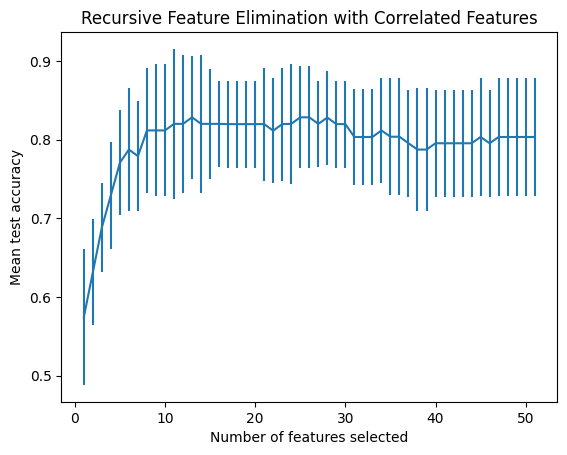

In [27]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Load df as X and y
subset_df = df[df['timepoint'] == 12]

X = subset_df.copy()
X = X.drop(['timepoint', 'embryo ID', 'endpoint clusters'], axis=1)
y = subset_df['endpoint clusters']

# Recursive Feature Elimination 
clf = LogisticRegression(random_state = 0)
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=1,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

# Print the selected features
selected_features = X.columns[rfecv.support_]
print("Selected Features:")
print(selected_features)

# Plot number of features vs cross-validation scores
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination with Correlated Features")
plt.show()


Optimal number of features: 2
Selected Features:
Index(['axis_minor_length', 'Haralick.Contrast.Mean'], dtype='object')


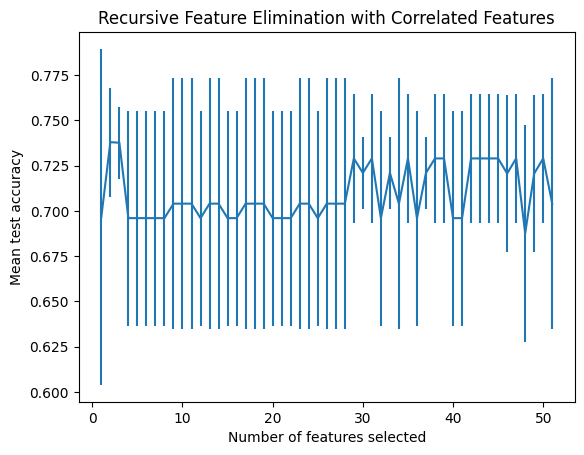

In [43]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Load df as X and y
subset_df = df[df['timepoint'] == 12]

X = subset_df.copy()
X = X.drop(['timepoint', 'embryo ID', 'endpoint clusters'], axis=1)
y = subset_df['endpoint clusters']

# Recursive Feature Elimination 
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=0)
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=1,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

# Print the selected features
selected_features = X.columns[rfecv.support_]
print("Selected Features:")
print(selected_features)

# Plot number of features vs cross-validation scores
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination with Correlated Features")
plt.show()


Optimal number of features: 13
Selected Features:
Index(['area', 'area_convex', 'axis_minor_length', 'Haralick.ASM.Range',
       'Haralick.SumOfSquares.Mean', 'Haralick.SumOfSquares.Range',
       'Haralick.SumAverage.Mean', 'Haralick.SumVariance.Range',
       'Haralick.SumEntropy.Range', 'Haralick.DifferenceVariance.Mean',
       'Haralick.DifferenceEntropy.Mean', 'Haralick.IMC1.Mean',
       'Haralick.IMC2.Mean'],
      dtype='object')


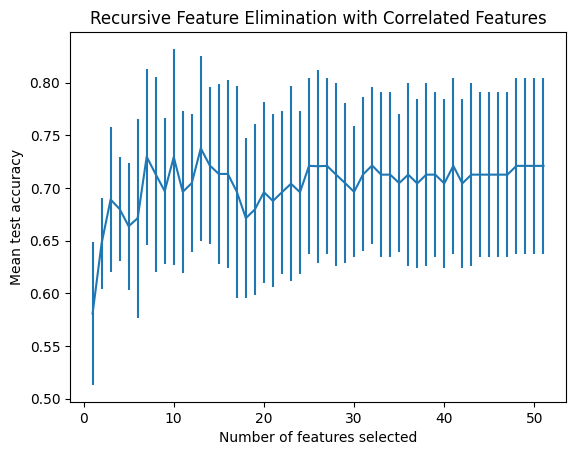

In [48]:
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

params = {"objective": "multi:softprob", "tree_method": "hist", "num_class": 6}


# Load df as X and y
subset_df = df[df['timepoint'] == 10]

X = subset_df.copy()
X = X.drop(['timepoint', 'embryo ID', 'endpoint clusters'], axis=1)
y = subset_df['endpoint clusters']

# Recursive Feature Elimination 
clf = XGBClassifier(**params, n_estimators=100, eta=0.1, max_depth=4)

cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=1,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

# Print the selected features
selected_features = X.columns[rfecv.support_]
print("Selected Features:")
print(selected_features)

# Plot number of features vs cross-validation scores
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination with Correlated Features")
plt.show()
